### generate chained conjunction dataset

In [79]:
def gen_chained_conj(seq_len, size, save_root, threshold=0.1):
    import os
    import torch
    # generate data
    X = torch.rand((size, seq_len))
    X[X>=threshold] = 1
    X[X<threshold] = 0
    X = X.int()
    y = torch.sum(X, dim=1)
    y = (torch.ones_like(y) * seq_len == y).int().unsqueeze(dim=1)
    # save data
    save_dir = os.path.join(save_root, str(seq_len))
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    torch.save(X, os.path.join(save_dir, "features.pt"))
    torch.save(y, os.path.join(save_dir, "labels.pt"))
    
    return X,y

In [116]:
# X, y = gen_chained_conj(seq_len=20, size=10000, save_root="./conj", threshold=0.04) # 1:0 = (4447, 5553)
# X, y = gen_chained_conj(seq_len=40, size=10000, save_root="./conj", threshold=0.02) # 1:0 = (4459, 5541)
# X, y = gen_chained_conj(seq_len=60, size=10000, save_root="./conj", threshold=0.01) # 1:0 = (5529, 4471)
# X, y = gen_chained_conj(seq_len=80, size=10000, save_root="./conj", threshold=0.01) # 1:0 = (4480, 5520)
# X, y = gen_chained_conj(seq_len=100, size=10000, save_root="./conj", threshold=0.008) # 1:0 = (4506, 5494)
X, y = gen_chained_conj(seq_len=200, size=10000, save_root="./conj", threshold=0.004) # 1:0 = (4459, 5541)

In [117]:
X.shape, y.shape

(torch.Size([10000, 200]), torch.Size([10000, 1]))

In [118]:
# check imbalance in conj
len(torch.where(y == 1)[0]), 10000-len(torch.where(y == 1)[0]) 

(4459, 5541)

### generate chained disjunction dataset

In [119]:
def gen_chained_disj(seq_len, size, save_root, threshold=0.9):
    import os
    import torch
    # generate data
    X = torch.rand((size, seq_len))
    X[X>=threshold] = 1
    X[X<threshold] = 0
    X = X.int()
    y = torch.sum(X, dim=1)
    y = (y != 0).int().unsqueeze(dim=1)
    # save data
    save_dir = os.path.join(save_root, str(seq_len))
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    torch.save(X, os.path.join(save_dir, "features.pt"))
    torch.save(y, os.path.join(save_dir, "labels.pt"))
    
    return X,y

In [191]:
# X, y = gen_chained_disj(seq_len=20, size=10000, save_root="./disj", threshold=0.8) # 0:1 = (125, 9875)
# X, y = gen_chained_disj(seq_len=40, size=10000, save_root="./disj", threshold=0.9) # 0:1 = (154, 9846)
# X, y = gen_chained_disj(seq_len=60, size=10000, save_root="./disj", threshold=0.93) # 0:1 = (135, 9865)
# X, y = gen_chained_disj(seq_len=80, size=10000, save_root="./disj", threshold=0.95) # 0:1 = (180, 9820)
# X, y = gen_chained_disj(seq_len=100, size=10000, save_root="./disj", threshold=0.96) # 0:1 = (148, 9852)
# X, y = gen_chained_disj(seq_len=200, size=10000, save_root="./disj", threshold=0.98) # 0:1 = (161, 9839)

In [192]:
X.shape, y.shape

(torch.Size([10000, 40]), torch.Size([10000, 1]))

In [193]:
# check imbalance in disj
len(torch.where(y == 0)[0]), 10000-len(torch.where(y == 0)[0]) 

(154, 9846)

In [461]:
# X = get_extreme_data(seq_len=20, ext_size=20, ext_len=10)

In [1]:
def gen_chained_data1(seq_len, size, save_root, threshold=0.9, mode="xor"):
    import os
    import torch
    
    # generate X
    X = torch.rand((size, seq_len))
    X[X>=threshold] = 1
    X[X<threshold] = 0
    X = X.int()
    
    # generate Y
    Y = torch.sum(X, dim=1)
    if mode == "xor":
        Y = Y % 2 != 0
    elif mode == "disj":
        Y = Y != 0
    elif mode == "conj":
        Y = torch.ones_like(Y) * seq_len == Y
    Y = Y.int().unsqueeze(dim=1)
    
    # save data
    save_dir = os.path.join(save_root, str(seq_len))
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    torch.save(X, os.path.join(save_dir, "features.pt"))
    torch.save(Y, os.path.join(save_dir, "labels.pt"))
    
    return X, Y

In [3]:
X, y = gen_chained_data1(seq_len=20, size=10000, save_root="./xor", threshold=0.8) # 0:1 = (125, 9875)

In [2]:
def gen_chained_data2(seq_len, size, save_root, test_ratio=0.1, ext_ratio=0.02, mode="xor"):
    import os
    import torch
    
    def get_extreme_data(seq_len, ext_size, ext_len=10):
        import numpy as np
        import torch
        X = []
        num = int(ext_size / (2*ext_len) )

        for i in range(ext_len):
            # generate almost 1 case where 1:0 = (seq_len-i, i)
            x10 = []
            for _ in range(num):
                a = [1 for _ in range(seq_len-i)]+[0 for _ in range(i)] 
                np.random.shuffle(a)
                x10.append(a)
            x10 = torch.Tensor(x10)
            X.append(x10)
            # generate almost 0 case where 0:1 = (seq_len-i, i)
            x01 = []
            for _ in range(num):
                a = [1 for _ in range(i)]+[0 for _ in range(seq_len-i)] 
                np.random.shuffle(a)
                x01.append(a)
            X.append(torch.Tensor(x01))

        X = torch.concatenate(X, dim=0)
        X = X[torch.randperm(ext_size)]

        return X
    
    # generate X
    test_size = int(size * test_ratio)
    train_size = size - test_size
    ext_test_size = int(test_size * ext_ratio)
    ext_train_size = int(train_size * ext_ratio)
    
    X1r = torch.rand((train_size-ext_train_size, seq_len))
    X1e = get_extreme_data(seq_len, ext_train_size)
    X1 = torch.concatenate([X1r,X1e], dim=0)
    X1 = X1[torch.randperm(train_size)]
    
    X2r = torch.rand((test_size-ext_test_size, seq_len))
    X2e = get_extreme_data(seq_len, ext_test_size)
    X2 = torch.concatenate([X2r,X2e], dim=0)
    X2 = X2[torch.randperm(test_size)]
    
    X = torch.concatenate([X1, X2], dim=0)
    X[X>=0.5] = 1
    X[X<0.5] = 0
    X = X.int()
    
    # generate Y
    Y = torch.sum(X, dim=1)
    if mode == "xor":
        Y = Y % 2 != 0
    elif mode == "disj":
        Y = Y != 0
    elif mode == "conj":
        Y = torch.ones_like(Y) * seq_len == Y
    Y = Y.int().unsqueeze(dim=1)
    
    # save data
    save_dir = os.path.join(save_root, str(seq_len))
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    torch.save(X, os.path.join(save_dir, "features.pt"))
    torch.save(Y, os.path.join(save_dir, "labels.pt"))
    
    return X, Y

In [4]:
X, y = gen_chained_data2(seq_len=200, size=10000, save_root="./xor",)

In [493]:
# X, y = gen_chained_xor(seq_len=20, size=10000, save_root="./xor") # (all0, all1) = (36, 34), (5, 3)
# X, y = gen_chained_xor(seq_len=40, size=10000, save_root="./xor") # (all0, all1) = (29, 33), (4, 4)
# X, y = gen_chained_xor(seq_len=60, size=10000, save_root="./xor") # (all0, all1) = (41, 39), (5, 6)
# X, y = gen_chained_xor(seq_len=80, size=10000, save_root="./xor") # (all0, all1) = (49, 33), (4, 5)
# X, y = gen_chained_xor(seq_len=100, size=10000, save_root="./xor",) # (all0, all1) = (34, 40), (5, 5)
X, y = gen_chained_xor(seq_len=200, size=10000, save_root="./xor",) # (all0, all1) = (28, 38), (3, 4)

In [494]:
X.shape, y.shape

(torch.Size([10000, 200]), torch.Size([10000, 1]))

In [495]:
(X.to(torch.bool)).all(dim=1).sum().item(), (~X.to(torch.bool)).all(dim=1).sum().item()

(10, 10)

In [496]:
(X[9000:].to(torch.bool)).all(dim=1).sum().item(), (~X[9000:].to(torch.bool)).all(dim=1).sum().item()

(1, 1)

In [497]:
import numpy as np
import pandas as pd
import seaborn as sns

In [498]:
data = {
    "seq": [],
    "model": [],
    "dataset": [],
    "acc": [],
    "precision": [],
    "recall": [],
    "f1": []
}

In [499]:
def add_item(data, model, dataset, seq, acc, pre, rec, f1):
    data['model'].append(model)
    data['dataset'].append(dataset)
    data['seq'].append(seq)
    data['acc'].append(acc)
    data['precision'].append(pre)
    data['recall'].append(rec)
    data['f1'].append(f1)

In [500]:
add_item(data, "SATNet", "xor", "20", 1.0, 1.0, 1.0, 1.0)
add_item(data, "SATNet", "xor", "40", 0.4900, 0.6544, 0.0431, 0.0773)
add_item(data, "SATNet", "xor", "60", 1.0, 1.0, 1.0, 1.0)
add_item(data, "SATNet", "xor", "80", 0.5060, 0.4761, 0.3929, 0.4302)
add_item(data, "SATNet", "xor", "100", 0.4990, 0.0, 0.0, 0.0)
add_item(data, "SATNet", "xor", "200", 1.0, 1.0, 1.0, 1.0)

In [501]:
add_item(data, "SATNet", "disj", "20", 0.9810, 0.9810, 1.0, 0.9904)
add_item(data, "SATNet", "disj", "40", 0.9860, 0.9860, 1.0, 0.9929)
add_item(data, "SATNet", "disj", "60", 0.9880, 0.9880, 1.0, 0.9939)
add_item(data, "SATNet", "disj", "80", 0.9810, 0.9810, 1.0, 0.9904)
add_item(data, "SATNet", "disj", "100",0.9870, 0.9870, 1.0, 0.9935)
add_item(data, "SATNet", "disj", "200",0.9820, 0.9820, 1.0, 0.9909)

In [502]:
add_item(data, "L1R32H4", "xor", "20", 0.4842, 0.4519, 0.1230, 0.1920)
add_item(data, "L1R32H4", "xor", "40", 0.4994, 0.5074, 0.4021, 0.4463)
add_item(data, "L1R32H4", "xor", "60", 0.5094, 0.5065, 0.4414, 0.4687)
add_item(data, "L1R32H4", "xor", "80", 0.4777, 0.4803, 0.5135, 0.4865)
add_item(data, "L1R32H4", "xor", "100", 0.4811, 0.5131, 0.3298, 0.3939)
add_item(data, "L1R32H4", "xor", "200", 0.4973, 0.5003, 0.5683, 0.5296)

In [503]:
add_item(data, "L1R32H4", "disj", "20", 1.0, 1.0, 1.0, 1.0)
add_item(data, "L1R32H4", "disj", "40", 1.0, 1.0, 1.0, 1.0)
add_item(data, "L1R32H4", "disj", "60", 1.0, 1.0, 1.0, 1.0)
add_item(data, "L1R32H4", "disj", '80', 1.0, 1.0, 1.0, 1.0)
add_item(data, "L1R32H4", "disj", "100", 1.0, 1.0, 1.0, 1.0)
add_item(data, "L1R32H4", "disj", "200", 1.0, 1.0, 1.0, 1.0)

In [504]:
df = pd.DataFrame(data)
df

,seq,model,dataset,acc,precision,recall,f1
0,20,SATNet,xor,1.0000,1.0000,1.0000,1.0000
1,40,SATNet,xor,0.4900,0.6544,0.0431,0.0773
2,60,SATNet,xor,1.0000,1.0000,1.0000,1.0000
3,80,SATNet,xor,0.5060,0.4761,0.3929,0.4302
4,100,SATNet,xor,0.4990,0.0000,0.0000,0.0000
5,200,SATNet,xor,1.0000,1.0000,1.0000,1.0000
6,20,SATNet,disj,0.9810,0.9810,1.0000,0.9904
7,40,SATNet,disj,0.9860,0.9860,1.0000,0.9929
8,60,SATNet,disj,0.9880,0.9880,1.0000,0.9939
9,80,SATNet,disj,0.9810,0.9810,1.0000,0.9904


In [505]:
melted_df = pd.melt(df, id_vars=['seq','model','dataset'], 
        value_vars=['acc', 'precision', 'recall', 'f1'],
        var_name='metric type', value_name='value'
       )
melted_df

,seq,model,dataset,metric type,value
0,20,SATNet,xor,acc,1.000
1,40,SATNet,xor,acc,0.490
2,60,SATNet,xor,acc,1.000
3,80,SATNet,xor,acc,0.506
4,100,SATNet,xor,acc,0.499
...,...,...,...,...,...
91,40,L1R32H4,disj,f1,1.000
92,60,L1R32H4,disj,f1,1.000
93,80,L1R32H4,disj,f1,1.000
94,100,L1R32H4,disj,f1,1.000


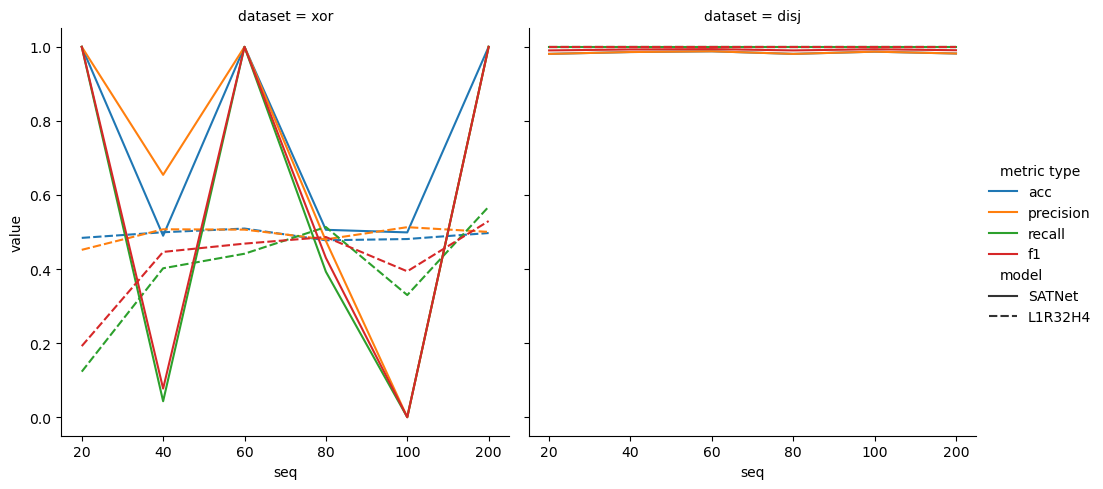

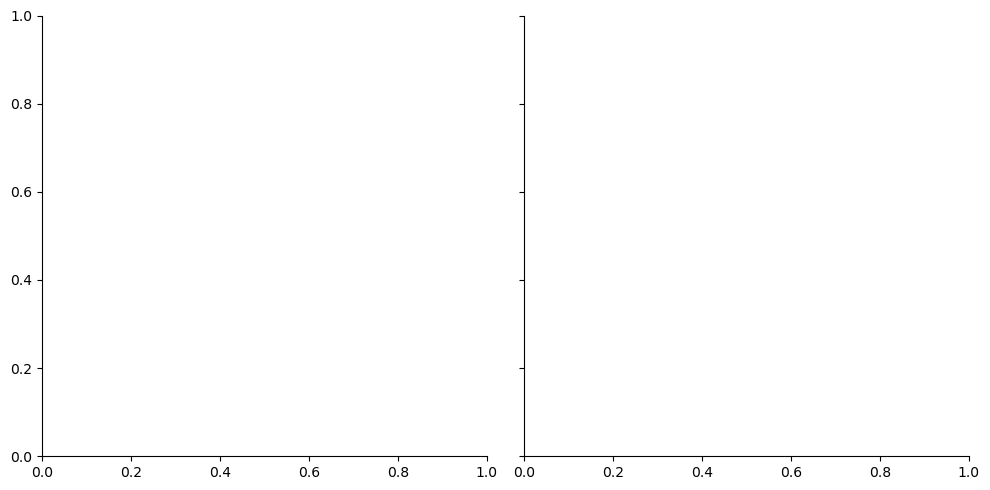

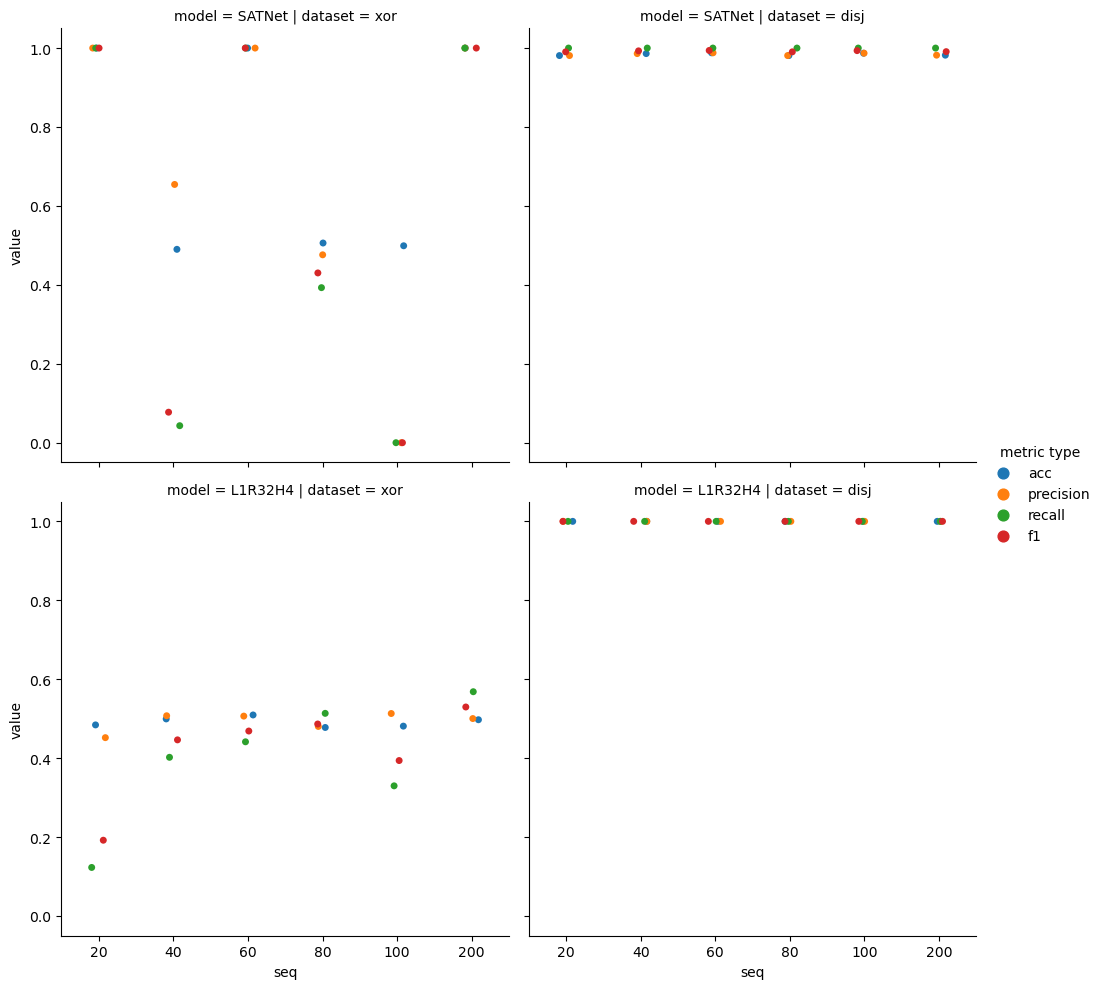

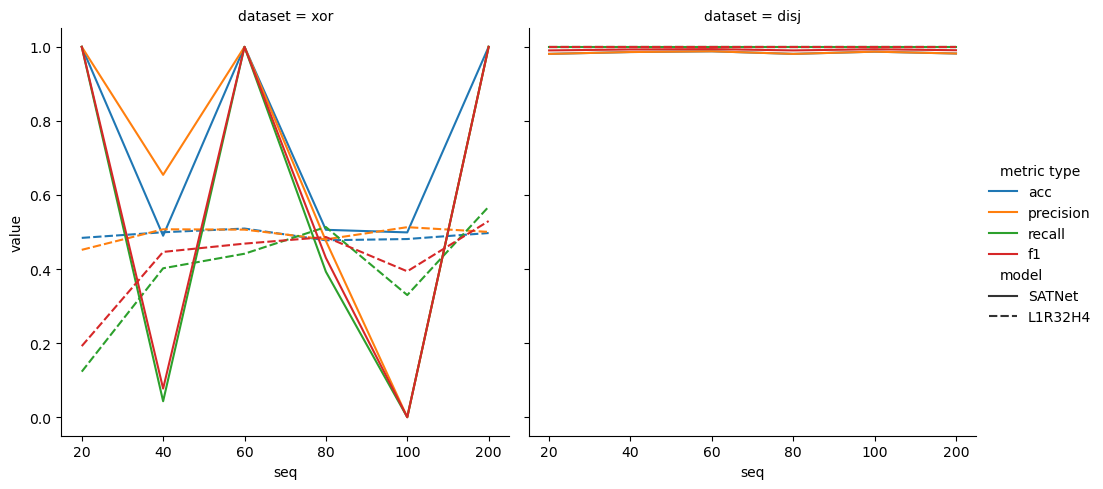

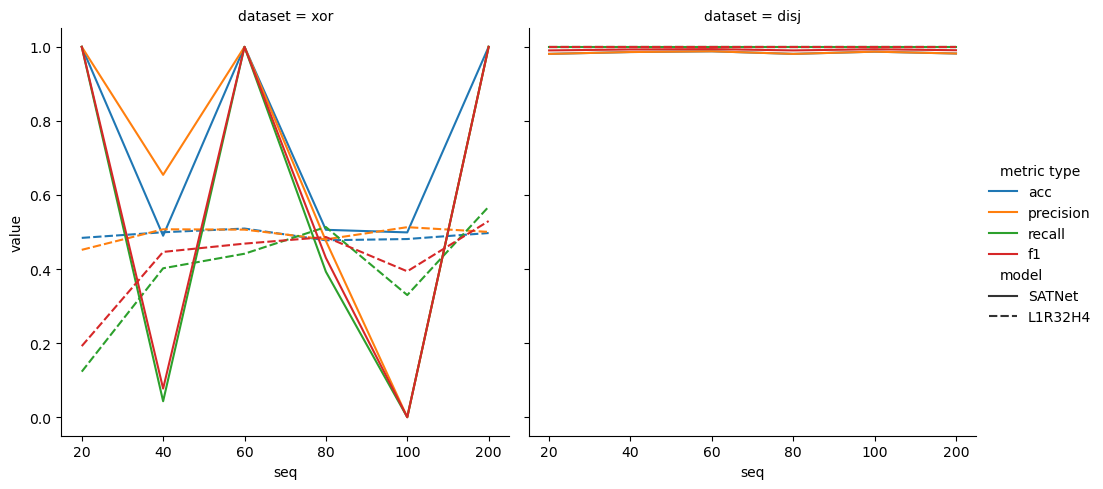

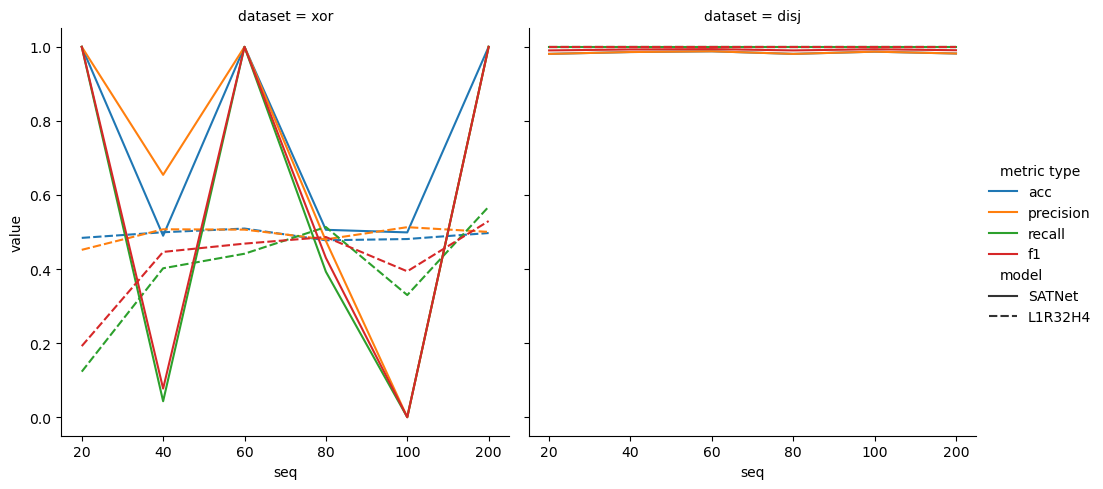

In [515]:
import matplotlib.pyplot as plt
sns.relplot(data=melted_df, x='seq', y="value", hue='metric type', style='model', col="dataset", kind="line")
plt.show()

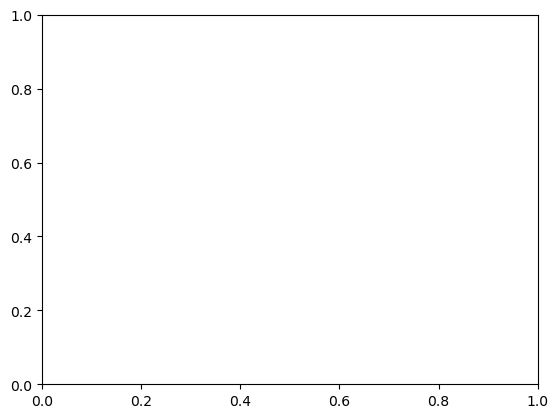

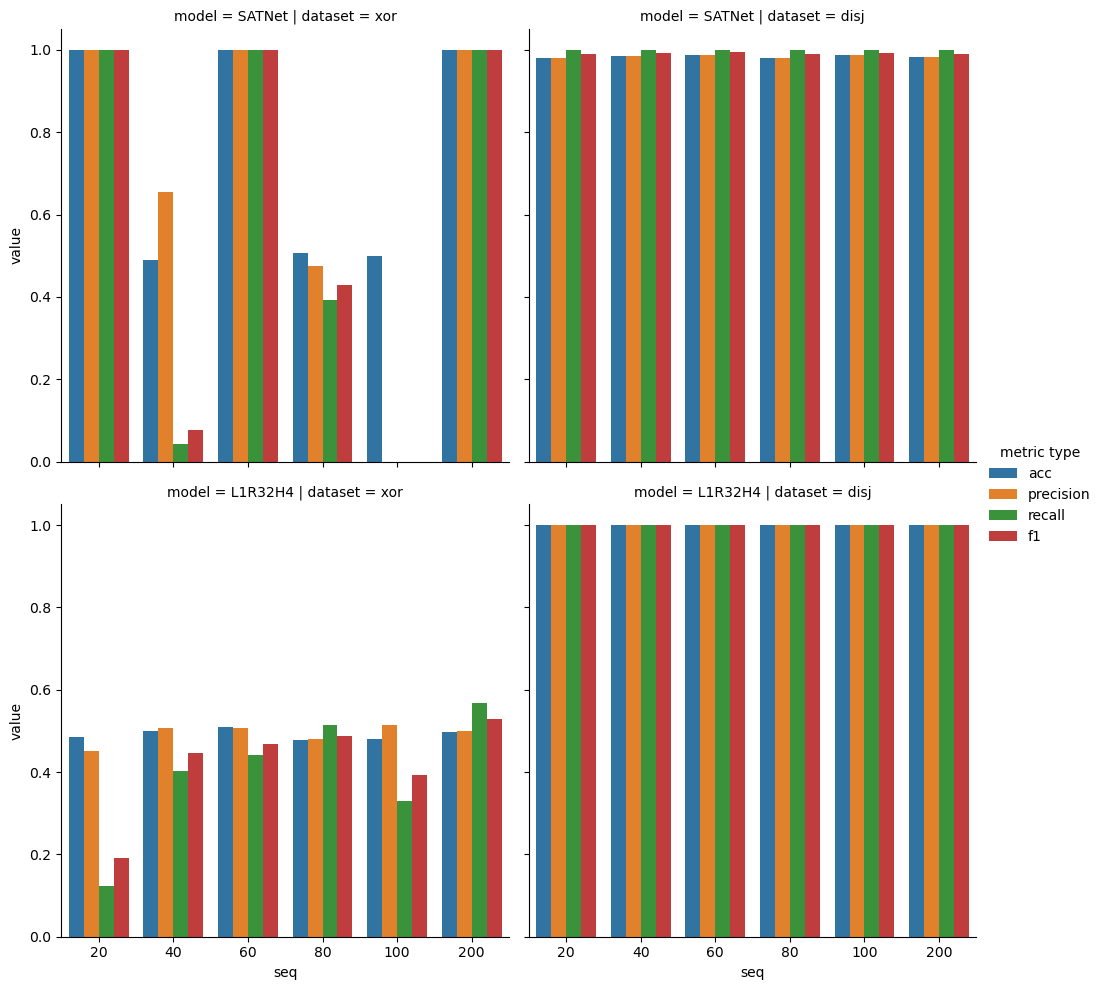

In [520]:
sns.catplot(data=melted_df, x='seq', y="value", hue='metric type', row='model', col="dataset", kind='bar')
plt.show()

In [1]:
def f1(T,P,TP):
    return 2*TP / (P+T)

In [2]:
f1(478, 394, 189)

0.4334862385321101

In [3]:
def nf1(T,P,TP,N=1000):
    return 2*(N-T-P+TP) / (2*N - T - P)

In [4]:
nf1(T=506, P=137, TP=64)

0.6204863669859986